In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
import cv2


In [2]:
X = np.zeros((2415 - 38, 32256))
Y = np.zeros(2415 - 38)
Xtest = np.zeros((38, 32256))
Ytest = np.zeros(38)

j = 0
i = 0
for subdir in os.listdir("final_dataset/yaleB/"):
    person = os.path.join("final_dataset/yaleB/", subdir)
    for imagefile in os.listdir(person):
        if imagefile.endswith("P00A-005E-10.pgm"):
            imageloc = os.path.join(person, imagefile)
            image = plt.imread(imageloc)
            curperson = int(subdir[5:]) - 1
            if curperson > 13:
                curperson -= 1
            Xtest[j, :] = image.flatten()
            Ytest[j] = curperson
            j += 1
        elif imagefile.endswith(".pgm"):
            imageloc = os.path.join(person, imagefile)
            image = plt.imread(imageloc)
            curperson = int(subdir[5:]) - 1
            if curperson > 13:
                curperson -= 1
            X[i, :] = image.flatten()
            Y[i] = curperson
            i += 1
    h, w = image.shape


In [3]:
indices = np.argsort(Y)
Ytrain = Y[indices]
Xtrain = X[indices, :]

A = Xtrain.T
mean_imgs = np.reshape(A.mean(axis=1), (32256, 1))
A = A - mean_imgs


def calculating_eigen_vectors(A):
    U, D, Vt = np.linalg.svd(A.T @ A)
    evects = A @ Vt.T
    norm = np.linalg.norm(evects, axis=0)
    return evects / norm

evects = calculating_eigen_vectors(A)


In [4]:
def reducedA(k, eV, A):
    Areduced = eV[:, :k].T @ A
    Arecovered = eV[:, :k] @ Areduced
    return Arecovered


Examples of reconstruction using different number of eigenfaces taken


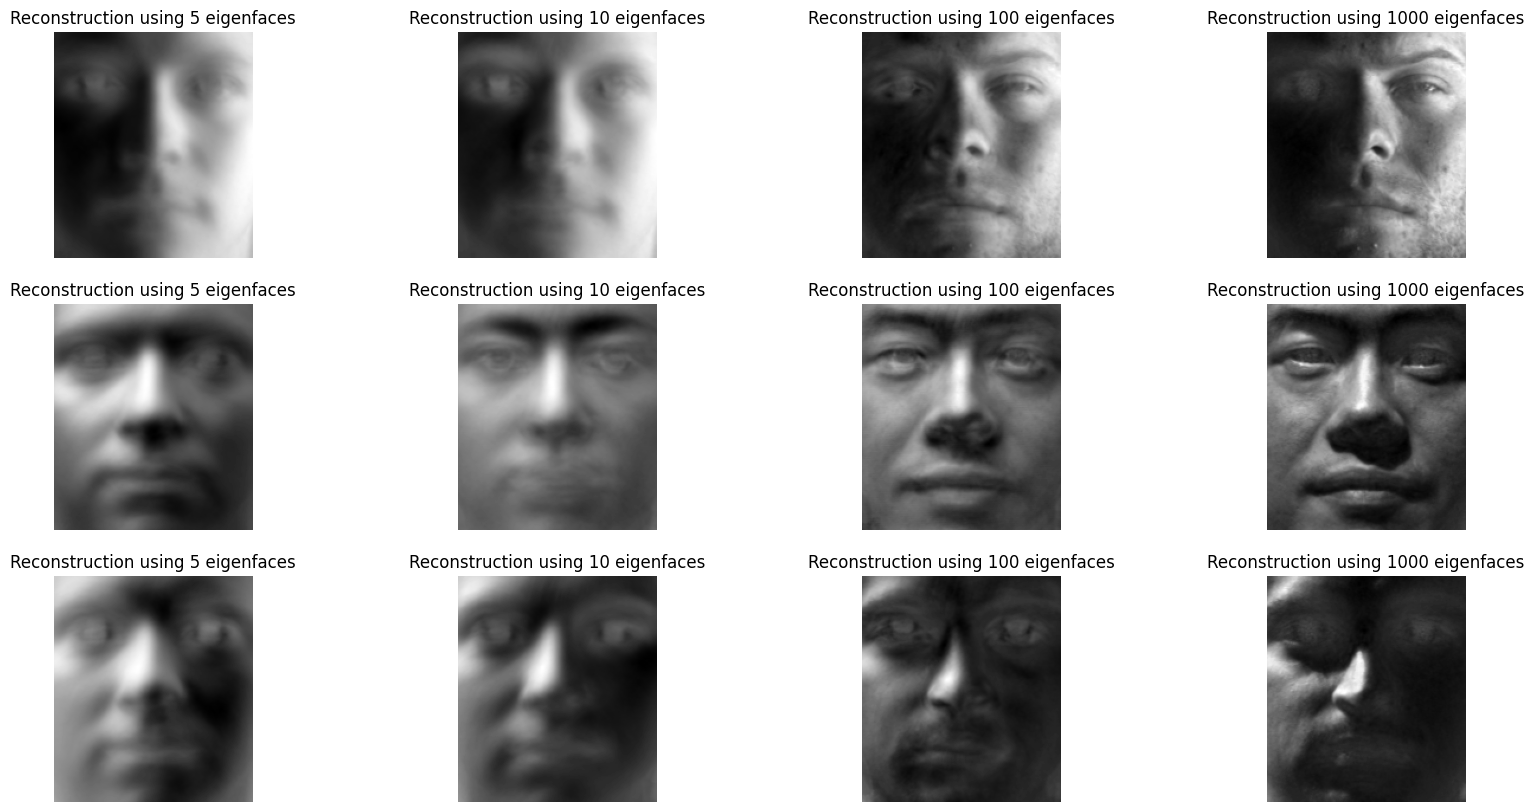

In [5]:
print("Examples of reconstruction using different number of eigenfaces taken")
fig = plt.figure(figsize=(20, 10))
eigenfaces_no = [5, 10, 100, 1000]
face_id = [20, 90, 540]
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1)
    plt.imshow(
        reducedA(eigenfaces_no[i % 4], evects, A)[
            :, face_id[math.floor(i / 4)]
        ].reshape((h, w)),
        cmap="gray",
    )
    plt.title("Reconstruction using " + str(eigenfaces_no[i % 4]) + " eigenfaces")
    plt.axis("off")

plt.show()


In [6]:
def which_trained_face(test_img, espace, mean_face, X_train, Y_train, actual=None):
    smallest_norm = 0x3F3F3F3F
    test_img = np.reshape(test_img, (32256, 1)) - mean_face

    for i in range(X_train.shape[0]):
        if i != actual or i is None:
            cur_img = np.reshape(X_train[i], (32256, 1)) - mean_face

            reduced_img = espace.T @ cur_img
            test_img_espace = espace.T @ test_img

            norm = np.linalg.norm(reduced_img - test_img_espace)

            if smallest_norm > norm:
                smallest_norm = norm
                person = Y_train[i]
                out = cur_img
    return smallest_norm, person, out


## Test for non-faces

In [7]:
link = []
link = glob.glob("final_dataset/PinDown__faces-of-everyday-objects/*.jpg")
len(link)


20

In [8]:
imgTemp = []
for i in range(len(link)):
    img = cv2.imread(link[i], 0)
    img = cv2.resize(img, (168, 192), interpolation=cv2.INTER_AREA)
    imgTemp.append(img)
len(imgTemp)


20

In [9]:
def show(imgs, names, rows, cols):
    fig = plt.figure(figsize=(15, 15))
    for num in range(len(imgs)):
        i, j = num / cols, num % cols
        i = int(i)
        ax = fig.add_subplot(rows, cols, num + 1)
        ax.imshow(imgs[num], cmap="gray")
        ax.set_title(names[num])
    plt.show()


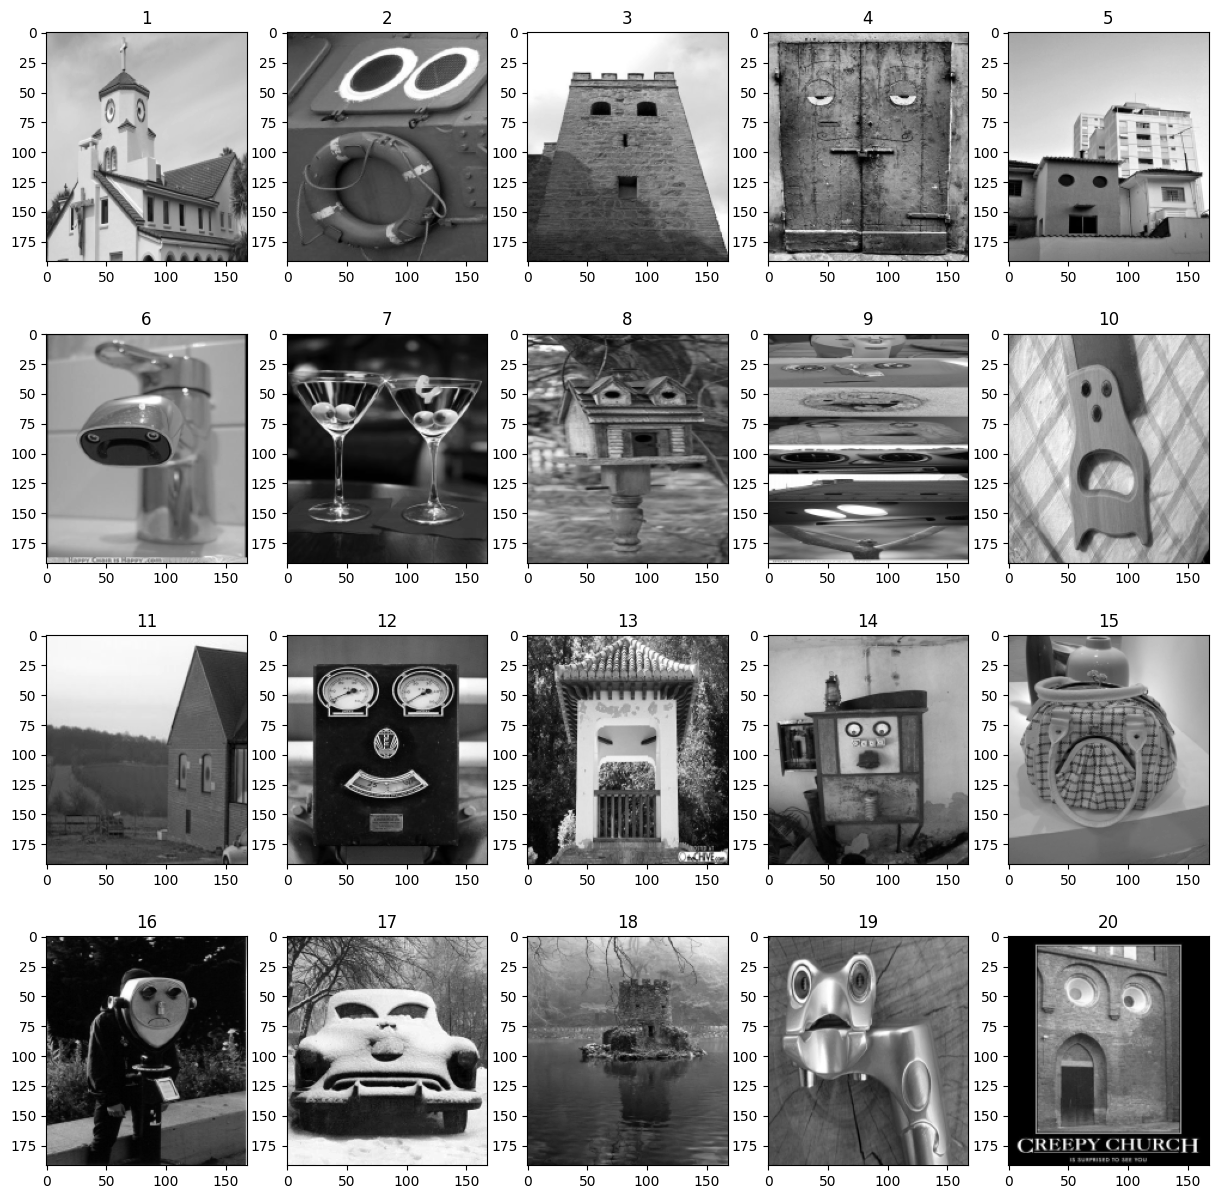

In [10]:
names = [
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "19",
    "20",
]
show(imgTemp, names, 4, 5)


In [11]:
sN_noFace = []
per_noFace = []
out_noFace = []
for i in range(20):
    sN1, per1, out1 = which_trained_face(
        imgTemp[i], evects[:, 0:10], mean_imgs, Xtrain, Ytrain
    )
    sN_noFace.append(sN1)
    per_noFace.append(per1)
    out_noFace.append(out1)


In [12]:
Y_predFace_noFace = []
for i in range(len(sN_noFace)):
    flag = 0
    if sN_noFace[i] > 3500:
        print(f"The image {i+1} is a non-face with a norm value = {sN_noFace[i]}")
        flag = 0
    else:
        print(f"The image {i+1} is a face with a norm value = {sN_noFace[i]}")
        flag = 1
    Y_predFace_noFace.append(flag)


The image 1 is a non-face with a norm value = 4472.399165190884
The image 2 is a non-face with a norm value = 3827.8348369344703
The image 3 is a non-face with a norm value = 7769.131228342985
The image 4 is a non-face with a norm value = 4267.184657190383
The image 5 is a non-face with a norm value = 4433.633315939496
The image 6 is a non-face with a norm value = 5123.492457391928
The image 7 is a non-face with a norm value = 3912.0373197581803
The image 8 is a non-face with a norm value = 4130.644896155026
The image 9 is a non-face with a norm value = 4053.3017774847053
The image 10 is a non-face with a norm value = 5452.420431578842
The image 11 is a non-face with a norm value = 5430.402722241032
The image 12 is a non-face with a norm value = 5212.356254262939
The image 13 is a face with a norm value = 2412.5415318721157
The image 14 is a non-face with a norm value = 5114.143694920297
The image 15 is a non-face with a norm value = 5340.17374779571
The image 16 is a non-face with a n

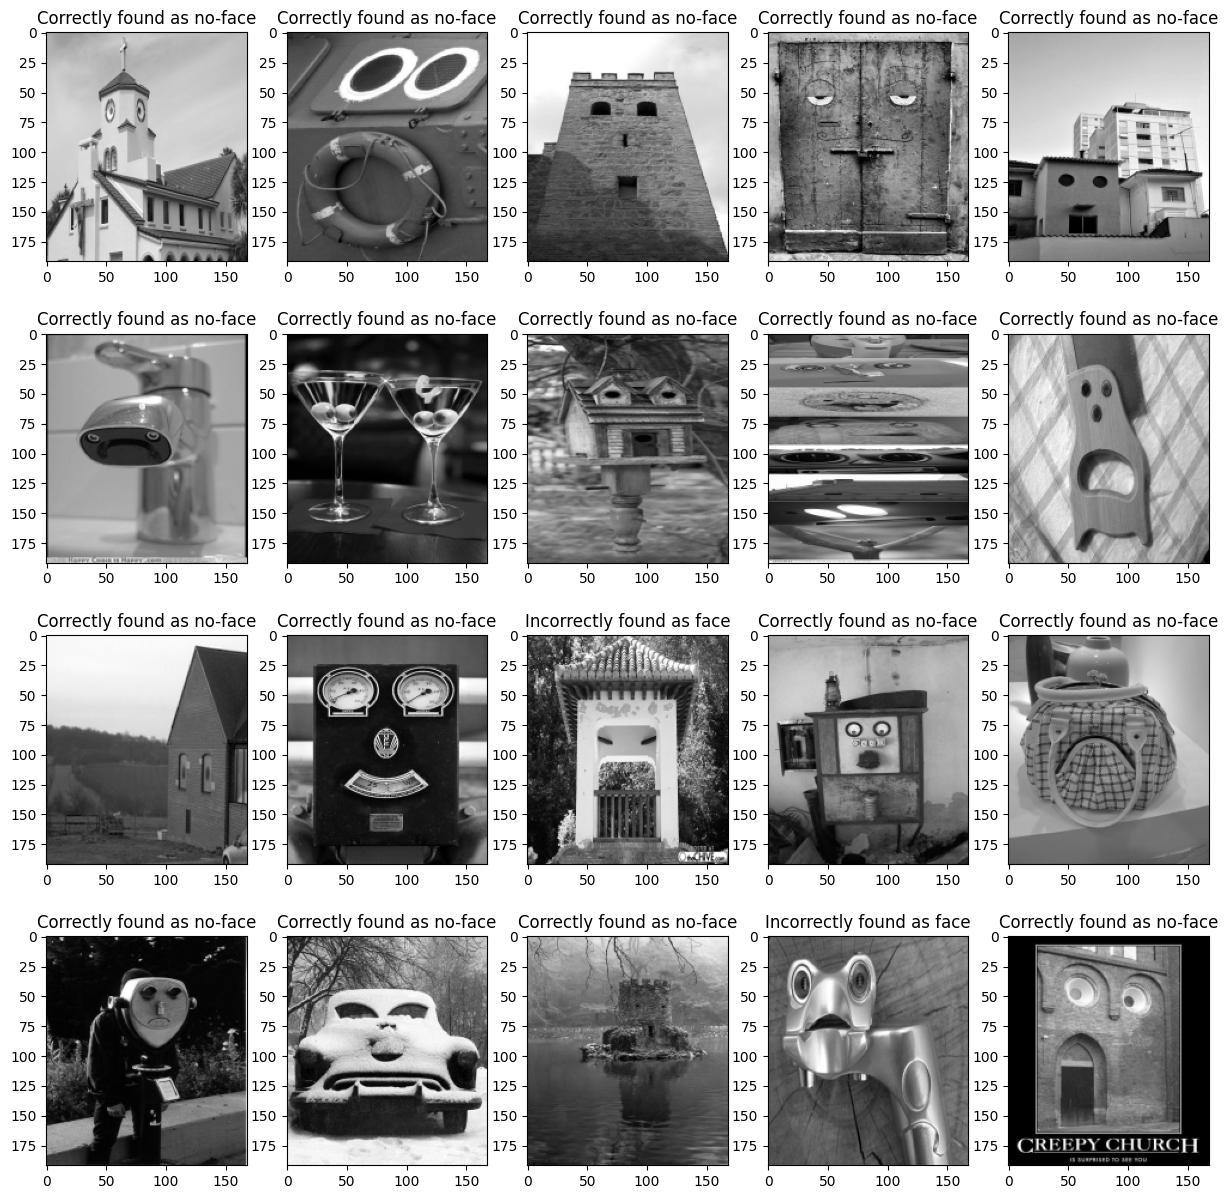

Final accuracy of test images for no-face = 90.0%


In [13]:
names = []
c2 = 0
for i in range(len(sN_noFace)):
    if Y_predFace_noFace[i] == 1:
        c2 += 1
        names.append("Incorrectly found as face")
    else:
        names.append("Correctly found as no-face")

show(imgTemp, names, 4, 5)
print(f"Final accuracy of test images for no-face = {100-(c2/len(sN_noFace)*100)}%")

## Test for faces and non-faces combined

In [14]:
imgTemp1 = cv2.imread("final_dataset/misc/nonFace.png", 0)
imgTemp2 = cv2.imread("final_dataset/misc/Mona.jpg", 0)
imgTemp3 = cv2.imread("final_dataset/misc/manFace1.jpeg", 0)
imgTemp4 = cv2.imread("final_dataset/misc/nonFace2.jpeg", 0)
imgTemp5 = cv2.imread("final_dataset/misc/dogFace.jpg", 0)
imgTemp6 = cv2.imread("final_dataset/misc/manFace2.jpeg", 0)
imgTemp7 = cv2.resize(
    cv2.imread("final_dataset/at&t/s1/4.pgm", 0),
    (168, 192),
    interpolation=cv2.INTER_AREA,
)
imgTemp8 = cv2.resize(
    cv2.imread("final_dataset/at&t/s2/8.pgm", 0),
    (168, 192),
    interpolation=cv2.INTER_AREA,
)
imgTemp9 = cv2.resize(
    cv2.imread("final_dataset/at&t/s3/9.pgm", 0),
    (168, 192),
    interpolation=cv2.INTER_AREA,
)
imgTemp10 = cv2.resize(
    cv2.imread("final_dataset/at&t/s4/3.pgm", 0),
    (168, 192),
    interpolation=cv2.INTER_AREA,
)
imgTemp11 = cv2.resize(
    cv2.imread("final_dataset/at&t/s5/7.pgm", 0),
    (168, 192),
    interpolation=cv2.INTER_AREA,
)
imgTemp12 = cv2.resize(
    cv2.imread("final_dataset/at&t/s6/2.pgm", 0),
    (168, 192),
    interpolation=cv2.INTER_AREA,
)
imgTemp13 = cv2.resize(
    cv2.imread("final_dataset/at&t/s7/1.pgm", 0),
    (168, 192),
    interpolation=cv2.INTER_AREA,
)
imgTemp14 = cv2.resize(
    cv2.imread("final_dataset/at&t/s8/3.pgm", 0),
    (168, 192),
    interpolation=cv2.INTER_AREA,
)
imgTemp15 = cv2.resize(
    cv2.imread("final_dataset/at&t/s9/5.pgm", 0),
    (168, 192),
    interpolation=cv2.INTER_AREA,
)
imgTemp16 = cv2.resize(
    cv2.imread("final_dataset/at&t/s10/6.pgm", 0),
    (168, 192),
    interpolation=cv2.INTER_AREA,
)
imgTemp = [
    imgTemp1,
    imgTemp2,
    imgTemp3,
    imgTemp4,
    imgTemp5,
    imgTemp6,
    imgTemp7,
    imgTemp8,
    imgTemp9,
    imgTemp10,
    imgTemp11,
    imgTemp12,
    imgTemp13,
    imgTemp14,
    imgTemp15,
    imgTemp16,
]

Y_testFace = [
    0,
    0,
    1,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
]


In [15]:
sN = []
out = []
per = []
for i in range(len(imgTemp)):
    sN1, per1, out1 = which_trained_face(
        imgTemp[i], evects[:, 0:10], mean_imgs, Xtrain, Ytrain
    )
    sN.append(sN1)
    out.append(out1)
    per.append(per1)


In [16]:
Y_predFace_Face = []
for i in range(len(sN)):
    flag = 0
    if sN[i] > 3500:
        print(f"The image {i+1} is a non-face with a norm value = {sN[i]}")
        flag = 0
    elif sN[i] < 2000:
        print(f"The image {i+1} is a part of training set with a norm value = {sN[i]}")
    else:
        print(f"The image {i+1} is a face with a norm value = {sN[i]}")
        flag = 1
    Y_predFace_Face.append(flag)


The image 1 is a non-face with a norm value = 3989.4343992766785
The image 2 is a non-face with a norm value = 5660.874041000071
The image 3 is a face with a norm value = 2937.8674954258795
The image 4 is a non-face with a norm value = 3954.8102845653
The image 5 is a non-face with a norm value = 4493.2151993079215
The image 6 is a non-face with a norm value = 6200.635970549823
The image 7 is a non-face with a norm value = 3657.8469111029444
The image 8 is a face with a norm value = 2388.379342496481
The image 9 is a face with a norm value = 2468.5731282399724
The image 10 is a face with a norm value = 3279.6155931805565
The image 11 is a face with a norm value = 2675.451005018547
The image 12 is a non-face with a norm value = 3964.45352785953
The image 13 is a face with a norm value = 2794.0178589137304
The image 14 is a face with a norm value = 2402.203161318766
The image 15 is a face with a norm value = 3324.011934118978
The image 16 is a face with a norm value = 3358.4438544012555


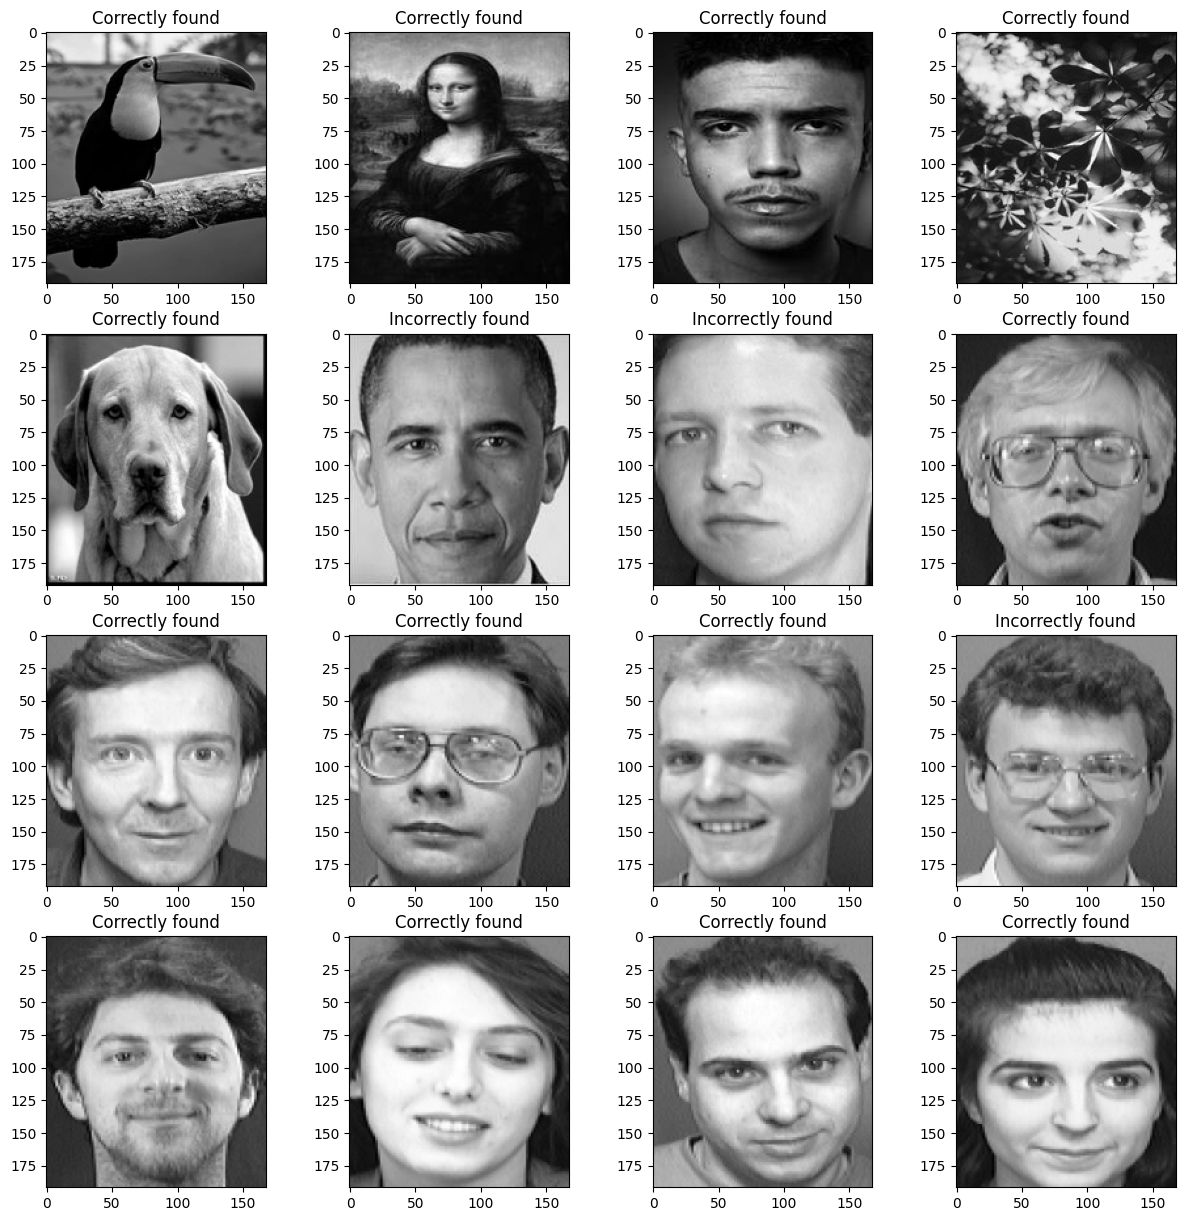

Final accuracy of test images for no-face and face combined = 81.25%


In [17]:
names = []
c3 = 0
for i in range(len(sN)):
    if Y_predFace_Face[i] != Y_testFace[i]:
        c3 += 1
        names.append("Incorrectly found")
    else:
        names.append("Correctly found")

show(imgTemp, names, 4, 4)

print(
    f"Final accuracy of test images for no-face and face combined = {100-(c3/len(sN)*100)}%"
)
